In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('astra21.parquet.snappy')
df

,label,npoints,grayscale255
0,Y,36.0,"[74.0, 40.0, 71.0, 91.0, 78.0, 53.0, 80.0, 63...."
1,N,131.0,"[110.0, 72.0, 92.0, 75.0, 111.0, 130.0, 130.0,..."
2,U,29.0,"[34.0, 30.0, 39.0, 13.0, 40.0, 38.0, 29.0, 32...."
3,N,101.0,"[125.0, 83.0, 162.0, 152.0, 129.0, 139.0, 156...."
4,N,33.0,"[145.0, 114.0, 151.0, 96.0, 91.0, 102.0, 125.0..."
...,...,...,...
24674,N,46.0,"[149.0, 138.0, 114.0, 167.0, 146.0, 116.0, 118..."
24675,N,26.0,"[119.0, 129.0, 124.0, 167.0, 76.0, 82.0, 150.0..."
24676,N,59.0,"[102.0, 135.0, 106.0, 156.0, 162.0, 123.0, 150..."
24677,N,50.0,"[125.0, 105.0, 185.0, 150.0, 156.0, 118.0, 74...."


**0 = No**

**1 = Uncertain**

**2 = Yes**

In [12]:
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])

df['label'].value_counts()

0    19940
2     3987
1      752
Name: label, dtype: int64

In [31]:
len(df.loc[0,'grayscale255']), len(df.loc[1,'grayscale255']) 

# 36 (npoint) * 33 = 1188
# 131 (npoint) * 33 = 4324

(1188, 4323)

Фича "npoints" характеризует высоту (h) изображения, ширина (w) всех изображений фиксирована и равна 33 пикселям

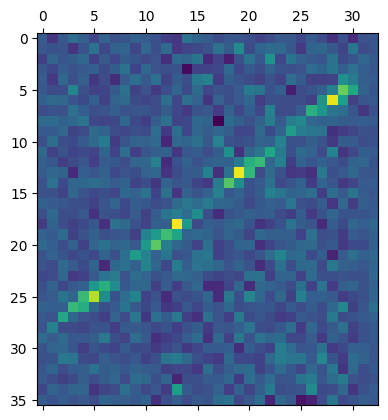

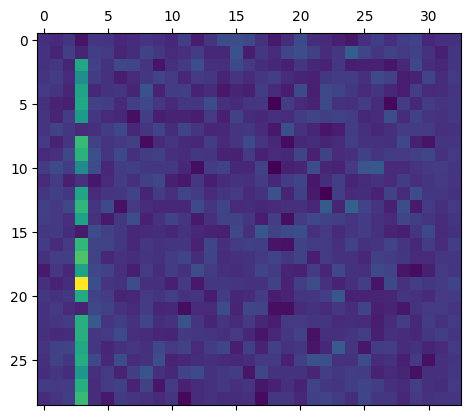

In [33]:
plt.matshow(df['grayscale255'][0].reshape(-1, 33))
plt.matshow(df['grayscale255'][2].reshape(-1, 33))

In [14]:
df['npoints'].min(), df['npoints'].max()

(24.0, 148.0)

Сохраним готовые изображения для дальнейшего обучения сверточных нейросетей для задачи классификации

In [36]:
for i in range(len(df)):
    plt.matshow(df['grayscale255'][i].reshape(-1, 33))
    plt.savefig('images/%d.png' % i, bbox_inches='tight')

C:\Users\Sveta\AppData\Local\Temp\ipykernel_7768\1860512502.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(df['grayscale255'][i].reshape(-1, 33))
